In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math 

In [2]:
ohca_data = pd.read_csv('ProjectData-OHCAs.csv')
volunteer_data = pd.read_csv('ProjectData-VolunteerResponses.csv')

In [5]:
# get all the time stamps of the ambulance
dispatch_times = np.floor(ohca_data["Dispatch_Time"])
dispatch_times

0             8.0
1            20.0
2            20.0
3            32.0
4            38.0
           ...   
19172    131012.0
19173    131028.0
19174    131032.0
19175    131032.0
19176    131037.0
Name: Dispatch_Time, Length: 19177, dtype: float64

In [6]:
for i in range(len(dispatch_times)):
    while dispatch_times[i]>168:
        dispatch_times[i]-=168

In [9]:
counts = np.zeros(169)
for i in range(len(dispatch_times)):
    counts[int(dispatch_times[i])] += 1

In [35]:
MLEs = counts/(1*780)
MLEs = pd.DataFrame(MLEs)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
MLEs

,0
0,0.000000
1,0.041026
2,0.035897
3,0.023077
4,0.021795
5,0.020513
6,0.041026
7,0.064103
8,0.105128
9,0.247436


Text(0, 0.5, 'Rate')

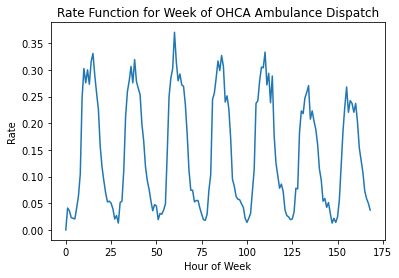

In [28]:
plt.plot(MLEs,'-')
plt.title('Rate Function for Week of OHCA Ambulance Dispatch')
plt.xlabel('Hour of Week')
plt.ylabel('Rate')